This is the first part of the project assigned to you.
The objective is the correctly classify some sources into stars, galaxies, and quasars using a combination of datasets from SDSS and from WISE.



For each question, you need to provide a textual answer with the associated programming code with the analysis and justification of your answer.

Every question counts for 2 points.

The two datasets used in this practical can be located in:

[df_wise.pkl](https://drive.google.com/file/d/1-Cu52dM6bgmiDpfoWINnTnDn9viR3Cd9/view?usp=sharing)

[df_sdss.pkl](https://drive.google.com/file/d/1-CIGdO6vAjhwqCmH88Cur6bWJDPBktZZ/view?usp=sharing)

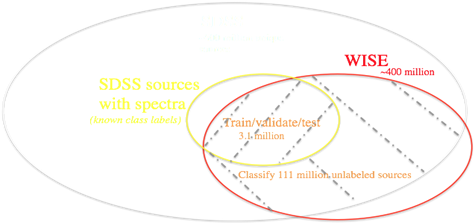

In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
#Loading/saving python data objects
# The "name" is rhe path to the datasets without extension
def save_obj(obj, name ):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name ):
    with open(name + '.pkl', 'rb') as f:
        return pickle.load(f)

In [55]:
#1/ Load the two datasets "df_wise.pkl" and "df_sdss.pkl". Are the two datasets "tidy"? Justify. Identify what is the common columns to used for the merge

# Define the path to your dataset file
df_wise_path = './drive/MyDrive/Semester/machine_learning/project1/df_wise.pkl'
df_sdss_path = './drive/MyDrive/Semester/machine_learning/project1/df_sdss.pkl'


# Load the dataset using pickle
with open(df_wise_path, 'rb') as file:
    wise = pickle.load(file)

with open(df_sdss_path, 'rb') as file:
    sdss = pickle.load(file)

print(wise)
print("xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx")
print(sdss)

        instance   class      w1      w2      w3     w4  w1err  w2err  \
0              0  GALAXY  12.732  12.740  10.863  8.701  0.024  0.027   
1              1  GALAXY  14.818  14.601  11.572  8.763  0.036  0.069   
2              2  GALAXY  15.139  14.804  12.495  9.162  0.041  0.081   
3              3     QSO  17.401  16.137  12.453  9.203  0.212  0.239   
4              4  GALAXY  14.960  14.778  11.504  8.995  0.042  0.094   
...          ...     ...     ...     ...     ...    ...    ...    ...   
104931    104931  GALAXY  16.620  16.309  12.123  8.564  0.127  0.336   
104932    104932    STAR  16.479  16.002  12.812  8.901  0.099  0.204   
104933    104933     QSO  15.334  14.570  11.782  9.163  0.048  0.061   
104934    104934  GALAXY  14.451  13.921  10.434  8.440  0.032  0.047   
104935    104935  GALAXY  15.934  15.379  12.574  8.842  0.070  0.131   

           w3err     w4err  
0          0.102     0.357  
1          0.177  9999.000  
2          0.403  9999.000  
3      

In [56]:
list(wise.columns)

['instance',
 'class',
 'w1',
 'w2',
 'w3',
 'w4',
 'w1err',
 'w2err',
 'w3err',
 'w4err']

In [57]:
list(sdss.columns)

['bossprimary',
 'sdssprimary',
 'specObjID',
 'objid',
 'Column1',
 'mjd',
 'plate',
 'fiberID',
 'run2d',
 'ra',
 'dec',
 'z',
 'z_noqso',
 'zErr_noqso',
 'class',
 'programname',
 'instrument',
 'survey',
 'scienceprimary',
 'zwarning',
 'boss_target1',
 'eboss_target1',
 'snmedian',
 'match_dist',
 'cmod_u',
 'cmod_g',
 'cmod_r',
 'cmod_i',
 'cmod_z',
 'cmoderr_u',
 'cmoderr_g',
 'cmoderr_r',
 'cmoderr_i',
 'cmoderr_z',
 'psf_u',
 'psf_g',
 'psf_r',
 'psf_i',
 'psf_z',
 'psferr_u',
 'psferr_g',
 'psferr_r',
 'psferr_i',
 'psferr_z',
 'ext_u',
 'ext_g',
 'ext_r',
 'ext_i',
 'ext_z',
 'resolvedr',
 'feature_1D',
 'instance']

The two datasets are not tidy. Following are the reasons:

1. 'bossprimary' column in the sdss dataset is written in float and can be converted into int type

2. One hot encoding can be applied to 'class', 'instrument', 'run2D', and 'programname' columns

3. For 'objid', first 5 digits can be elliminated to reduce data size

4. As the columns 'scienceprimary', 'zwarning' and 'eboss_target1' have same data in all rows, these rows can be elliminated.


Column `'instance'` can be used for merging the two datasets.


In [58]:
#2/ Merge the two datasets in a variable "df" and display the first 5 lines stored in "df". The following questions all are about "df". Ensure that df does not have duplicated columns
df_wise= pd.DataFrame(wise)
df_sdss = pd.DataFrame(sdss)

#merge the database in 'instance' column
df=pd.merge(df_wise, df_sdss, on='instance')

# Check if values in class_x and class_y are equal for each row
df['ValuesEqual'] = (df['class_x'] == df['class_y'])

# Check if all values in the 'ValuesEqual' column are True
all_values_equal = df['ValuesEqual'].all()


print("are all values in class_x and class_y equal? " + str(all_values_equal))

df.drop(columns=['ValuesEqual'], inplace=True)
df.drop(columns=['class_y'], inplace=True) #delete the extra class_y column
df.rename(columns={'class_x': 'class'}, inplace=True) #rename the class_x to class

#printng first 5 rows
print(df.head(5))
list(df.columns)

are all values in class_x and class_y equal? True
   instance   class      w1      w2      w3     w4  w1err  w2err  w3err  \
0         0  GALAXY  12.732  12.740  10.863  8.701  0.024  0.027  0.102   
1         1  GALAXY  14.818  14.601  11.572  8.763  0.036  0.069  0.177   
2         2  GALAXY  15.139  14.804  12.495  9.162  0.041  0.081  0.403   
3         3     QSO  17.401  16.137  12.453  9.203  0.212  0.239  0.395   
4         4  GALAXY  14.960  14.778  11.504  8.995  0.042  0.094  0.198   

      w4err  bossprimary  sdssprimary     specObjID                objid  \
0     0.357          0.0            1  5.348116e+17  1237651753457483779   
1  9999.000          1.0            0  6.732944e+18  1237667912204812507   
2  9999.000          1.0            0  6.103742e+18  1237662238008672533   
3  9999.000          1.0            0  7.188949e+18  1237657769629909306   
4  9999.000          0.0            1  1.791355e+18  1237661383305724246   

        Column1    mjd  plate  fiberID    

['instance',
 'class',
 'w1',
 'w2',
 'w3',
 'w4',
 'w1err',
 'w2err',
 'w3err',
 'w4err',
 'bossprimary',
 'sdssprimary',
 'specObjID',
 'objid',
 'Column1',
 'mjd',
 'plate',
 'fiberID',
 'run2d',
 'ra',
 'dec',
 'z',
 'z_noqso',
 'zErr_noqso',
 'programname',
 'instrument',
 'survey',
 'scienceprimary',
 'zwarning',
 'boss_target1',
 'eboss_target1',
 'snmedian',
 'match_dist',
 'cmod_u',
 'cmod_g',
 'cmod_r',
 'cmod_i',
 'cmod_z',
 'cmoderr_u',
 'cmoderr_g',
 'cmoderr_r',
 'cmoderr_i',
 'cmoderr_z',
 'psf_u',
 'psf_g',
 'psf_r',
 'psf_i',
 'psf_z',
 'psferr_u',
 'psferr_g',
 'psferr_r',
 'psferr_i',
 'psferr_z',
 'ext_u',
 'ext_g',
 'ext_r',
 'ext_i',
 'ext_z',
 'resolvedr',
 'feature_1D']

different values in the target column
['GALAXY' 'QSO' 'STAR']


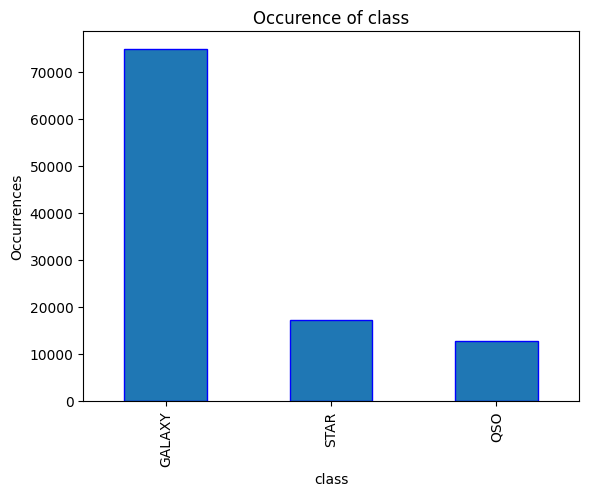

In [59]:
#3/ What is the target column ? Display its different values, and plot the corresponding histogram

#Target column is the class

#different values in the target column
classes= df['class'].unique()
print ("different values in the target column")
print(classes)


value_counts = df['class'].value_counts()

#histogram
value_counts.plot(kind='bar', edgecolor='blue')

#labels
plt.xlabel('class')
plt.ylabel('Occurrences')
plt.title('Occurence of class')

plt.show()

Target column is `class`

In [60]:
#4/ How many rows are missing values? What are the problematic features? Propose one fix
#rows with with no value are given below
# one fix for the missing value is to assign a median or mean value of the column to the cells with missing value

missing_values = df.isnull().sum()
print(missing_values)

instance            0
class               0
w1                  0
w2                  0
w3                  0
w4                  0
w1err               0
w2err               0
w3err               0
w4err               0
bossprimary       162
sdssprimary         0
specObjID           0
objid               0
Column1             0
mjd                 0
plate               0
fiberID             0
run2d               0
ra                  0
dec                 0
z                   0
z_noqso             0
zErr_noqso          0
programname         0
instrument          0
survey              0
scienceprimary    269
zwarning            0
boss_target1        0
eboss_target1       0
snmedian            0
match_dist          0
cmod_u              0
cmod_g              0
cmod_r              0
cmod_i              0
cmod_z              0
cmoderr_u           0
cmoderr_g           0
cmoderr_r           0
cmoderr_i           0
cmoderr_z           0
psf_u               0
psf_g               0
psf_r     

In [61]:
#5/ How many rows have duplicate values? Propose one fix

# Check for duplicate rows across all columns
df['IsDuplicateRow'] = df.duplicated(keep=False)

# Count the total number of rows with duplicate data across all columns
total_duplicate_rows = df[df['IsDuplicateRow']].shape[0]

# Display the total number of rows with duplicate data across all columns
print("Total Rows with Duplicate Data Across All Columns:", total_duplicate_rows)

df.drop(columns=['IsDuplicateRow'], inplace=True) #delete the extra IsDuplicateRow column
print(df.shape)

Total Rows with Duplicate Data Across All Columns: 0
(104936, 60)


There are no rows with duplicate values across all the columns.

In [62]:
#6/ How many features are totally useless for prediction? What are the problematic features and why? Propose one fix

#We have already merged class_x and class_y to get single column of class.

#bossprimary and sdssprimary are seem to have opposite values, i.e. when one is 1 the other is 0. So this might be reduced to one feature. To check this values across columns can be checked.

same_values_mask = (df['bossprimary'] == df['sdssprimary'])

# Count the total number of rows with the same values across columns
total_rows_with_same_values = same_values_mask.sum()

print("Total Rows with Same Values Across Columns:", total_rows_with_same_values)

Total Rows with Same Values Across Columns: 128


#bossprimary and sdssprimary are kept
The total number of same values across row is more than 0, hence Both the columns needs to be kept.

#Check if 'instrument' column can be dropped
In columns 'programname' and 'survey', the values are seem to be associated with values in column 'instrument'. Hence we can group the two columns 'programname' and 'survey' with value associated with 'instruments' and if there is no overlap of values in the columns 'programname' and 'survey', then we can drop the column 'instrument'

In [64]:
# Group by 'instrument' and aggregate the associated values
associations = df.groupby('instrument').agg(lambda x: set(x))

# Check for overlapping associations between 'BOSS' and 'SDSS' in columns 'survey' and 'programname'
overlap_programname = associations.loc['BOSS']['programname'].intersection(associations.loc['SDSS']['programname'])
overlap_survey = associations.loc['BOSS']['survey'].intersection(associations.loc['SDSS']['survey'])

# Print the associations of BOSS and SDSS in the columns 'survey' and 'programname'
for instrument, values in associations.iterrows():
    print(f"Values associated with {instrument}:", values['programname'], values['survey'])


print("\nOverlapping associations between BOSS and SDSS:")
print("Overlapping programname:", overlap_programname)
print("Overlapping survey:", overlap_survey)

#running the code found that 'commissioning' value is associated with both instrument 'BOSS' and 'SDSS'

print("\nOccurrences of 'commissioning' in associations:")

#count occurance of of 'commissioning'
commissioning_count_programname = associations.apply(lambda x: 'commissioning' in x['programname'], axis=1).sum()
commissioning_count_survey = associations.apply(lambda x: 'commissioning' in x['survey'], axis=1).sum()
print("Occurrences in programname:", commissioning_count_programname)
print("Occurrences in survey:", commissioning_count_survey)

Values associated with BOSS: {'eboss', 'boss_lofar', 'special_plates_W3', 'special_plates_TDSS_SPIDERS', 'special_sky', 'SEQUELS_ELG', 'DEEP_QSO', 'special_plates_S82', 'special_plates_NGC', 'RM', 'sequels', 'boss', 'XMMXLL', 'Orion_Taurus', 'special_elg', 'special_plates_W1', 'commissioning', 'SEGUE_GES'} {'eboss', 'boss'}
Values associated with SDSS: {'msturnoff', 'disk', 'segcluster', 'seguefaint', 'segue', 'orion', 'lowz_lrg', 'fstars', 'segtestf', 'segpointedf', 'm31_fstars', 'segpointed', 'seglowlat', 'legacy', 'commissioning', 'perseus', 'preboss', 'reddening', 'lowz', 'lowz_loveday', 'taurus', 'segtest', 'segue2', 'southern', 'photoz', 'hyades', 'premarvels_preselection', 'segclusterf', 'seglowlatf'} {'segue1', 'sdss', 'segue2'}

Overlapping associations between BOSS and SDSS:
Overlapping programname: {'commissioning'}
Overlapping survey: set()

Occurrences of 'commissioning' in associations:
Occurrences in programname: 2
Occurrences in survey: 0


#Drop Instrument column
As 'commissioning' is only occured twice between the column 'programname' and all other data is completely different for SDSS and BOSS instruments in the columns 'programname' and 'survey'. The instrument column is dropped and the value of 'commissioning' in the column 'programname' is changed to 'commissioning_sdss' and 'commissioning_boss'.

In [65]:
# Change 'commissioning' to 'commissioning_sdss' for SDSS
df.loc[(df['instrument'] == 'SDSS') & (df['programname'] == 'commissioning'), 'programname'] = 'commissioning_sdss'
# Change 'commissioning' to 'commissioning_boss' for BOSS
df.loc[(df['instrument'] == 'BOSS') & (df['programname'] == 'commissioning'), 'programname'] = 'commissioning_boss'


#check for common association again
# Group by 'instrument' and aggregate the associated values
associations = df.groupby('instrument').agg(lambda x: set(x))

# Check for overlapping associations between 'BOSS' and 'SDSS' in columns 'survey' and 'programname'
overlap_programname = associations.loc['BOSS']['programname'].intersection(associations.loc['SDSS']['programname'])
overlap_survey = associations.loc['BOSS']['survey'].intersection(associations.loc['SDSS']['survey'])

# Print the associations of BOSS and SDSS in the columns 'survey' and 'programname'
for instrument, values in associations.iterrows():
    print(f"Values associated with {instrument}:", values['programname'], values['survey'])

print("\nOverlapping associations between BOSS and SDSS:")
print("Overlapping programname:", overlap_programname)
print("Overlapping survey:", overlap_survey)

print(df.shape)

# Check if both overlap_programname and overlap_survey are empty sets
if not overlap_programname and not overlap_survey:
    # Delete the 'instrument' column
    df = df.drop(columns='instrument')

# Verify the DataFrame after the deletion
#print(df)
print(df.shape)

Values associated with BOSS: {'eboss', 'boss_lofar', 'special_plates_W3', 'special_plates_TDSS_SPIDERS', 'special_sky', 'SEQUELS_ELG', 'commissioning_boss', 'DEEP_QSO', 'special_plates_NGC', 'RM', 'sequels', 'boss', 'XMMXLL', 'Orion_Taurus', 'special_plates_S82', 'special_elg', 'special_plates_W1', 'SEGUE_GES'} {'eboss', 'boss'}
Values associated with SDSS: {'msturnoff', 'commissioning_sdss', 'disk', 'segcluster', 'seguefaint', 'segue', 'orion', 'lowz_lrg', 'fstars', 'segtestf', 'segpointedf', 'm31_fstars', 'segpointed', 'seglowlat', 'legacy', 'perseus', 'preboss', 'reddening', 'lowz', 'lowz_loveday', 'taurus', 'segtest', 'segue2', 'southern', 'photoz', 'hyades', 'premarvels_preselection', 'segclusterf', 'seglowlatf'} {'segue1', 'sdss', 'segue2'}

Overlapping associations between BOSS and SDSS:
Overlapping programname: set()
Overlapping survey: set()
(104936, 60)
(104936, 59)


Here the 'instrument' column was deleted as it was useless for prediction

In [81]:
print(df.columns)

Index(['instance', 'class', 'w1', 'w2', 'w3', 'w4', 'w1err', 'w2err', 'w3err',
       'w4err', 'bossprimary', 'sdssprimary', 'specObjID', 'objid', 'Column1',
       'mjd', 'plate', 'fiberID', 'run2d', 'ra', 'dec', 'z', 'z_noqso',
       'zErr_noqso', 'programname', 'survey', 'scienceprimary', 'zwarning',
       'boss_target1', 'eboss_target1', 'snmedian', 'match_dist', 'cmod_u',
       'cmod_g', 'cmod_r', 'cmod_i', 'cmod_z', 'cmoderr_u', 'cmoderr_g',
       'cmoderr_r', 'cmoderr_i', 'cmoderr_z', 'psf_u', 'psf_g', 'psf_r',
       'psf_i', 'psf_z', 'psferr_u', 'psferr_g', 'psferr_r', 'psferr_i',
       'psferr_z', 'ext_u', 'ext_g', 'ext_r', 'ext_i', 'ext_z', 'resolvedr',
       'feature_1D'],
      dtype='object')


In [ ]:
#7/ Which features are best for Label Encoding? Process them accordingly

None of the remaining features are good for lable encoding.
However, some features are good for hot lable encoding. These features are class, programname, survey and run2d.

In [91]:
df.columns

Index(['instance', 'class', 'w1', 'w2', 'w3', 'w4', 'w1err', 'w2err', 'w3err',
       'w4err', 'bossprimary', 'sdssprimary', 'specObjID', 'objid', 'Column1',
       'mjd', 'plate', 'fiberID', 'run2d', 'ra', 'dec', 'z', 'z_noqso',
       'zErr_noqso', 'programname', 'survey', 'scienceprimary', 'zwarning',
       'boss_target1', 'eboss_target1', 'snmedian', 'match_dist', 'cmod_u',
       'cmod_g', 'cmod_r', 'cmod_i', 'cmod_z', 'cmoderr_u', 'cmoderr_g',
       'cmoderr_r', 'cmoderr_i', 'cmoderr_z', 'psf_u', 'psf_g', 'psf_r',
       'psf_i', 'psf_z', 'psferr_u', 'psferr_g', 'psferr_r', 'psferr_i',
       'psferr_z', 'ext_u', 'ext_g', 'ext_r', 'ext_i', 'ext_z', 'resolvedr',
       'feature_1D'],
      dtype='object')

In [95]:
#8/ What are the anomalies of the dataset (noised, outliers, duplicate, mistyped) ? Propose one fix
df.describe()

,instance,w1,w2,w3,w4,w1err,w2err,w3err,w4err,bossprimary,sdssprimary,specObjID,objid,Column1,mjd,plate,fiberID,ra,dec,z,z_noqso,zErr_noqso,scienceprimary,zwarning,boss_target1,eboss_target1,snmedian,match_dist,cmod_u,cmod_g,cmod_r,cmod_i,cmod_z,cmoderr_u,cmoderr_g,cmoderr_r,cmoderr_i,cmoderr_z,psf_u,psf_g,psf_r,psf_i,psf_z,psferr_u,psferr_g,psferr_r,psferr_i,psferr_z,ext_u,ext_g,ext_r,ext_i,ext_z,resolvedr,feature_1D
count,104936.000000,104936.000000,104936.000000,104936.000000,104936.000000,104936.000000,104936.000000,104936.000000,104936.000000,104774.000000,104936.000000,1.049360e+05,1.049360e+05,1.049360e+05,104936.000000,104936.000000,104936.000000,104936.000000,104936.000000,104936.000000,104936.000000,104936.000000,104667.000000,104936.000000,1.049360e+05,1.049360e+05,104936.000000,104936.000000,104936.000000,104936.000000,104936.000000,104936.000000,104936.000000,104936.000000,104936.000000,104936.000000,104936.000000,104936.000000,104936.000000,104936.000000,104936.000000,104936.000000,104936.000000,1.049360e+05,104936.000000,104936.000000,104936.000000,104936.000000,104936.000000,104936.000000,104936.000000,104936.000000,104936.000000,104936.000000,104936.000000
mean,52467.500000,15.119015,14.866634,12.201751,8.945185,2.242997,219.832793,5750.268882,8124.104093,0.576698,0.422181,4.551793e+18,1.237664e+18,4.551793e+18,54951.957593,4042.700713,422.364222,174.083755,24.080537,0.443947,0.257520,0.006866,0.980357,0.031410,1.756646e+11,2.458771e+12,11.151417,0.437057,21.051334,20.034143,18.973656,18.364393,18.028696,0.417375,0.093949,0.056767,0.031725,0.076933,22.274385,20.910974,19.827354,19.224314,18.841620,6.403710e+01,0.128759,0.087450,0.081742,0.081274,0.176145,0.137251,0.094949,0.070558,0.052482,0.858510,0.008214
std,30292.558261,1.039949,0.999416,0.861540,0.495851,148.016620,1465.873281,4942.729289,3902.742563,0.494085,0.493909,2.618992e+18,8.186390e+12,2.618992e+18,1594.708776,2326.113319,264.138607,89.580192,19.430600,0.551163,0.303355,1.389840,0.197233,0.708218,1.216317e+12,5.299695e+13,13.268274,0.528289,2.205065,2.049496,1.760157,1.553305,1.496550,1.566208,0.398231,3.886787,0.922973,1.069113,2.070762,2.007538,1.666753,1.441535,1.360278,2.060720e+04,2.231957,3.373598,3.469540,0.529316,0.261278,0.203586,0.140840,0.104659,0.077847,0.716027,3.762952
min,0.000000,6.455000,6.555000,4.368000,1.874000,0.020000,0.019000,0.013000,0.017000,0.000000,0.000000,2.995015e+17,1.237646e+18,2.995015e+17,51608.000000,266.000000,1.000000,0.002317,-19.329642,-0.004020,-0.011447,-6.000000,-1.000000,0.000000,0.000000e+00,0.000000e+00,-0.007406,0.000000,11.510440,12.130710,11.270180,10.818810,10.396880,0.002211,0.001637,0.001565,0.001551,0.001652,10.717910,9.440932,8.677361,8.389962,8.674767,3.306671e-04,0.000099,0.000087,0.000087,0.000189,0.012261,0.009554,0.006609,0.004911,0.003653,0.000000,-8.669425
25%,26233.750000,14.455000,14.188000,11.971000,8.740000,0.031000,0.049000,0.265000,9999.000000,0.000000,0.000000,2.131384e+18,1.237658e+18,2.131384e+18,53491.000000,1893.000000,201.000000,131.468995,7.099697,0.080990,0.000000,0.000000,1.000000,0.000000,0.000000e+00,0.000000e+00,2.415195,0.160291,19.477858,18.299688,17.511328,17.115458,16.851897,0.055547,0.008874,0.006884,0.006915,0.016292,20.827145,19.448697,18.680335,18.275725,17.939213,7.004872e-02,0.022605,0.018291,0.018830,0.026696,0.080769,0.062934,0.043538,0.032353,0.024065,0.077052,-3.232323
50%,52467.500000,15.184000,14.957500,12.437000,9.024000,0.041000,0.082000,9999.000000,9999.000000,1.000000,0.000000,4.772934e+18,1.237663e+18,4.772934e+18,55539.000000,4239.000000,398.000000,177.381170,22.593179,0.346629,0.084846,0.000037,1.000000,0.000000,0.000000e+00,0.000000e+00,6.000200,0.268908,20.700890,20.335775,19.220375,18.665980,18.293065,0.228512,0.032467,0.018863,0.016740,0.044502,22.496120,21.037665,19.998205,19.495490,19.123420,2.707949e-01,0.042102,0.028153,0.027448,0.051621,0.126791,0.098794,0.068346,0.050788,0.037777,0.839620,-0.638727
75%,78701.250000,15.740000,15.552000,12.

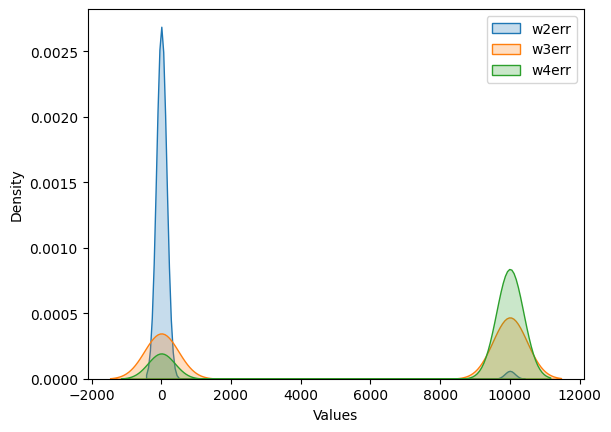

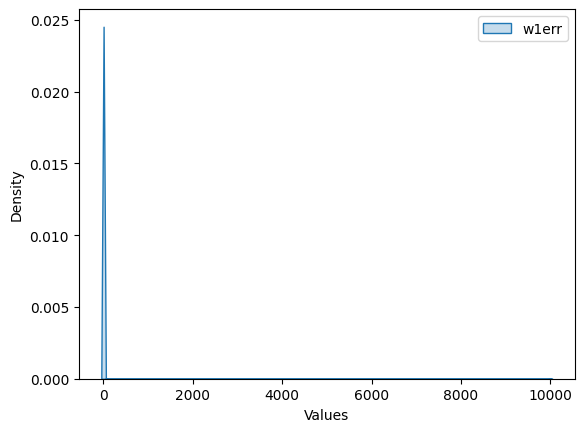

In [115]:
import seaborn as sns

# Columns to plot
columns_to_plot = ['w2err', 'w3err', 'w4err']

# Plot KDE for each column on the same plot
for column in columns_to_plot:
    sns.kdeplot(df[column], fill=True, label=column)

# Labels and title
plt.xlabel('Values')
plt.ylabel('Density')
#plt.title('Kernel Density Estimation (KDE) Plot for w1err, w2err, w3err, and w4err')

# Adding legend
plt.legend()

# Display the plot
plt.show()

################################################################################################

# Columns to plot
columns_to_plot = ['w1err']

# Plot KDE for each column on the same plot
for column in columns_to_plot:
    sns.kdeplot(df[column], fill=True, label=column)

# Labels and title
plt.xlabel('Values')
plt.ylabel('Density')
#plt.title('Kernel Density Estimation (KDE) Plot for w1err, w2err, w3err, and w4err')

# Adding legend
plt.legend()

# Display the plot
plt.show()


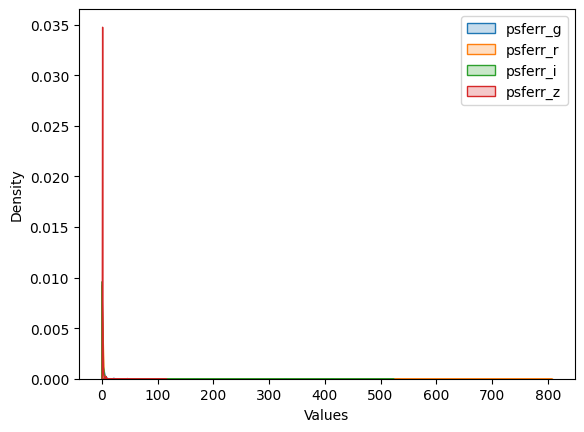

In [123]:
columns_to_plot = ['psferr_g', 'psferr_r', 'psferr_i', 'psferr_z']

# Plot KDE for each column on the same plot
for column in columns_to_plot:
    sns.kdeplot(df[column], fill=True, label=column)

# Labels and title
plt.xlabel('Values')
plt.ylabel('Density')
#plt.title('Kernel Density Estimation (KDE) Plot for w1err, w2err, w3err, and w4err')

# Adding legend
plt.legend()

# Display the plot
plt.show()


In [109]:
columns_to_calculate = ['w1err', 'w2err', 'w3err', 'w4err', 'psferr_g', 'psferr_r', 'psferr_i', 'psferr_z', 'ext_u', 'ext_g', 'ext_r', 'ext_i', 'ext_z']

for column in columns_to_calculate:
    column_values = df[column]

    # Calculate statistics
    mean_value = np.mean(column_values)
    percentile_99 = np.percentile(column_values, 99)
    percentile_95 = np.percentile(column_values, 95)

    # Print the results
    print(f'Statistics for {column}: Mean={mean_value}, 95th Percentile={percentile_95}, 99th Percentile={percentile_99}')


Statistics for w1err: Mean=2.2429974651215985, 95th Percentile=0.127, 99th Percentile=0.19699999999999998
Statistics for w2err: Mean=219.83279320728823, 95th Percentile=0.322, 99th Percentile=9999.0
Statistics for w3err: Mean=5750.268881861325, 95th Percentile=9999.0, 99th Percentile=9999.0
Statistics for w4err: Mean=8124.104092828011, 95th Percentile=9999.0, 99th Percentile=9999.0
Statistics for psferr_g: Mean=0.1287585776425667, 95th Percentile=0.31140080000000003, 99th Percentile=0.6590420399999968
Statistics for psferr_r: Mean=0.08744990675724232, 95th Percentile=0.12111782500000001, 99th Percentile=0.32975265499999995
Statistics for psferr_i: Mean=0.08174211706523939, 95th Percentile=0.078491485, 99th Percentile=0.23326438499999796
Statistics for psferr_z: Mean=0.08127369267522586, 95th Percentile=0.16657122500000002, 99th Percentile=0.40397645999999987
Statistics for ext_u: Mean=0.1761445338648319, 95th Percentile=0.40750990000000004, 99th Percentile=0.8346704349999999
Statistics

From the above analysis, no anomalies were conclusively found.

In [131]:
df

,instance,class,w1,w2,w3,w4,w1err,w2err,w3err,w4err,bossprimary,sdssprimary,specObjID,objid,Column1,mjd,plate,fiberID,run2d,ra,dec,z,z_noqso,zErr_noqso,programname,survey,scienceprimary,zwarning,boss_target1,eboss_target1,snmedian,match_dist,cmod_u,cmod_g,cmod_r,cmod_i,cmod_z,cmoderr_u,cmoderr_g,cmoderr_r,cmoderr_i,cmoderr_z,psf_u,psf_g,psf_r,psf_i,psf_z,psferr_u,psferr_g,psferr_r,psferr_i,psferr_z,ext_u,ext_g,ext_r,ext_i,ext_z,resolvedr,feature_1D
0,0,GALAXY,12.732,12.740,10.863,8.701,0.024,0.027,0.102,0.357,0.0,1,5.348116e+17,1237651753457483779,5.348116e+17,51965,475,33,26,143.42927,1.605381,0.072712,0.000000,0.000000,legacy,sdss,1.0,0,0,0,27.144610,0.361300,17.86919,16.35411,15.55034,15.15111,14.89326,0.037046,0.004345,0.003289,0.003260,0.006996,20.28621,18.31815,17.49023,17.09882,16.62118,0.053635,0.017164,0.020035,0.015338,0.022683,0.248477,0.193612,0.133940,0.099532,0.074033,1.93989,5.632565
1,1,GALAXY,14.818,14.601,11.572,8.763,0.036,0.069,0.177,9999.000,1.0,0,6.732944e+18,1237667912204812507,6.732944e+18,56338,5980,228,v5_10_0,187.48388,25.451184,0.385929,0.385929,0.000063,boss,boss,1.0,0,1,0,3.220585,0.498783,21.14988,21.39543,19.40700,18.83162,18.90613,2.012217,0.607864,0.031998,0.029036,0.122406,24.68405,22.86604,21.10678,20.61102,20.09156,0.755503,0.264472,0.126844,0.096359,0.121034,0.080311,0.062577,0.043291,0.032170,0.023928,1.69978,-3.555544
2,2,GALAXY,15.139,14.804,12.495,9.162,0.041,0.081,0.403,9999.000,1.0,0,6.103742e+18,1237662238008672533,6.103742e+18,55980,5421,869,v5_10_0,197.47015,10.146641,0.506781,0.506781,0.000136,boss,boss,1.0,0,134,0,3.636166,0.319046,24.75952,21.78103,19.90934,19.24479,18.97456,1.968344,0.102993,0.035686,0.021907,0.068260,24.75084,22.21462,20.75691,19.81021,19.33844,1.136031,0.145117,0.044055,0.027282,0.064874,0.097553,0.076012,0.052585,0.039076,0.029066,0.84757,-2.706106
3,3,QSO,17.401,16.137,12.453,9.203,0.212,0.239,0.395,9999.000,1.0,0,7.188949e+18,1237657769629909306,7.188949e+18,56356,6385,283,v5_10_0,133.62918,43.055550,1.665025,0.938892,0.000187,special_plates_NGC,boss,1.0,0,0,0,4.407072,1.258854,20.86361,20.37778,20.25927,19.94288,19.89099,0.086704,0.021750,0.028839,0.033712,0.111467,20.95170,20.38400,20.25592,19.93506,19.86297,0.081494,0.034677,0.031006,0.036048,0.094730,0.117752,0.091752,0.063474,0.047168,0.035084,0.00335,-0.379335
4,4,GALAXY,14.960,14.778,11.504,8.995,0.042,0.094,0.198,9999.000,0.0,1,1.791355e+18,1237661383305724246,1.791355e+18,52976,1591,176,26,136.95236,31.524475,0.117805,0.000000,0.000000,legacy,sdss,1.0,0,0,0,8.656992,0.510733,19.43473,18.34294,17.68426,17.34502,17.00361,0.071986,0.010871,0.008328,0.008086,0.022666,22.41779,20.65702,19.68501,19.47346,19.25758,0.199284,0.025772,0.020307,0.023419,0.045135,0.101284,0.078920,0.054596,0.040571,0.030177,2.00075,-0.019409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104931,104931,GALAXY,16.620,16.309,12.123,8.564,0.127,0.336,0.384,0.433,0.0,1,1.230680e+18,1237657190902857854,1.230680e+18,52591,1093,261,26,354.57454,-0.199263,0.074532,0.000000,0.000000,southern,sdss,1.0,0,0,0,5.491979,0.978105,20.07198,19.12141,18.93671,17.98391,18.65334,0.050434,0.012978,0.017657,0.014898,0.094903,20.68020,20.07105,20.46560,19.81989,20.08070,0.057175,0.021470,0.027476,0.025211,0.097156,0.173264,0.135007,0.093397,0.069404,0.051624,1.52889,-0.084712
104932,104932,STAR,16.479,16.002,12.812,8.901,0.099,0.204,9999.000,9999.000,0.0,1,3.663822e+18,1237661070338556069,3.663822e+18,54889,3254,522,104,188.80435,15.565492,0.000337,0.000000,0.000000,segue2,segue2,1.0,0,0,0,17.714380,3.478492,20.10257,19.07145,18.66152,18.49149,18.36291,0.043555,0.010649,0.009046,0.015231,0.048511,20.14172,19.08772,18.64795,18.51453,18.39307,0.046733,0.036643,0.032667,0.021321,0.039961,0.146627,0.114251,0.079038,0.058734,0.043687,0.01357,2.538056
104933,104933

In [ ]:
import pandas as pd

# Assuming df is your DataFrame
df = pd.get_dummies(df, columns=['class'], prefix='C')

# Display the DataFrame with one-hot encoding
print(df)

In [ ]:
df

In [163]:
df.columns

Index(['instance', 'w1', 'w2', 'w3', 'w4', 'w1err', 'w2err', 'w3err', 'w4err',
       'bossprimary', 'sdssprimary', 'specObjID', 'objid', 'Column1', 'mjd',
       'plate', 'fiberID', 'run2d', 'ra', 'dec', 'z', 'z_noqso', 'zErr_noqso',
       'programname', 'survey', 'scienceprimary', 'zwarning', 'boss_target1',
       'eboss_target1', 'snmedian', 'match_dist', 'cmod_u', 'cmod_g', 'cmod_r',
       'cmod_i', 'cmod_z', 'cmoderr_u', 'cmoderr_g', 'cmoderr_r', 'cmoderr_i',
       'cmoderr_z', 'psf_u', 'psf_g', 'psf_r', 'psf_i', 'psf_z', 'psferr_u',
       'psferr_g', 'psferr_r', 'psferr_i', 'psferr_z', 'ext_u', 'ext_g',
       'ext_r', 'ext_i', 'ext_z', 'resolvedr', 'feature_1D', 'C_GALAXY',
       'C_QSO', 'C_STAR'],
      dtype='object')

In [ ]:
#9/ Which features are correlated with the classification target? Which other features are most correlated with each other?

target_columns = ['C_GALAXY', 'C_QSO', 'C_STAR']

for target_column in target_columns:
    # Calculate the correlation matrix excluding the target column and other specified columns
    excluded_columns = target_columns.copy()
    excluded_columns.remove(target_column)
    correlation_matrix = df.drop(columns=excluded_columns).corr()

    # Select the correlation values for the target column
    correlations_with_target = correlation_matrix[target_column]

    # Sort the correlations in descending order
    sorted_correlations = correlations_with_target.sort_values(ascending=False)

    # Print the highest and lowest correlated features
    print(f"\nHighest and lowest correlated features with {target_column}:")
    print("Most correlated feature:", sorted_correlations.index[1])
    print("Highest correlation value:", sorted_correlations.iloc[1])

    print("Least correlated feature:", sorted_correlations.index[-1])
    print("Lowest correlation value:", sorted_correlations.iloc[-1])
    print('x___________________________________________x___________________________________________x___________________________________________x')

<ipython-input-187-92477d39977e>:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()



Top 6 most correlated features with C_GALAXY:
C_STAR: -0.7011317465374765
resolvedr: 0.6891098855802323
C_QSO: -0.587122335544597
psf_u: 0.5282179221048134
psf_g: 0.47395790775666846
snmedian: -0.41592629136733617


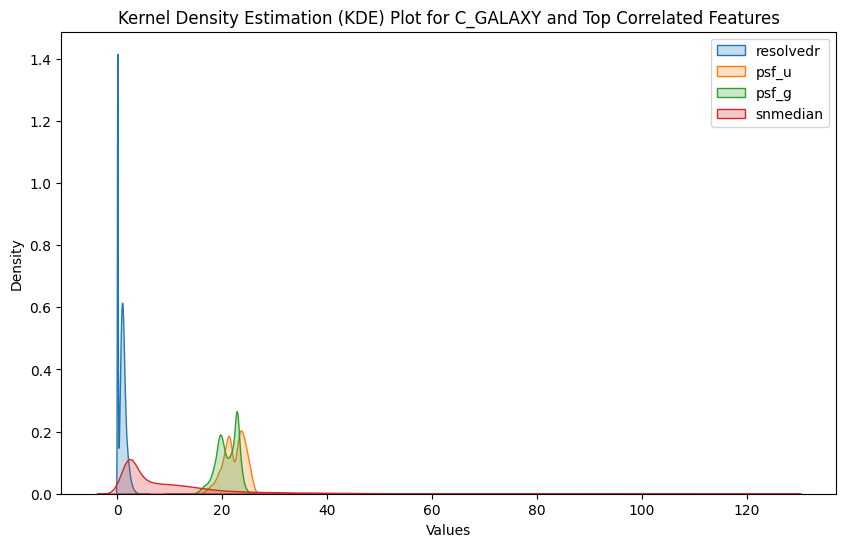

<ipython-input-187-92477d39977e>:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()



Top 6 most correlated features with C_QSO:
z: 0.7418313614856629
C_GALAXY: -0.587122335544597
resolvedr: -0.3989580375389622
cmod_z: 0.3757095511524947
boss_target1: 0.3531160757730389
w1: 0.3430614654151919


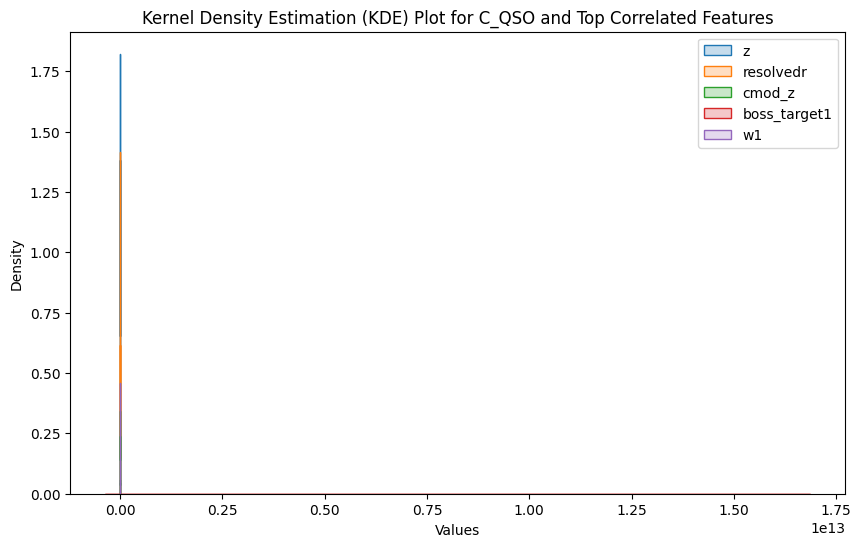

<ipython-input-187-92477d39977e>:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()



Top 6 most correlated features with C_STAR:
C_GALAXY: -0.7011317465374765
snmedian: 0.6017261135313002
psf_i: -0.5520187864334247
psf_z: -0.5471669426909923
psf_r: -0.5069570056578421
resolvedr: -0.4881192194178891


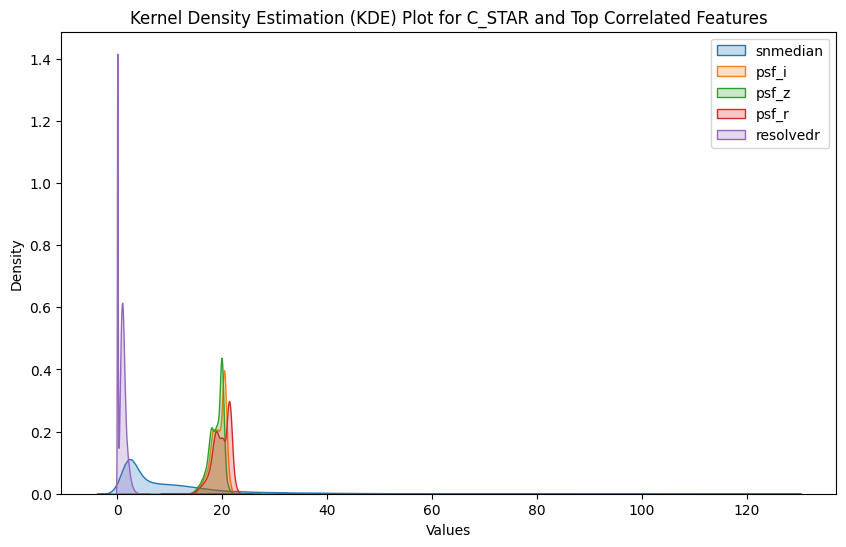

In [187]:
#10/ For the 5 most correlated features, plot the associated Kernel Density Estimation of the target with these features? What can you infer?



target_columns = ['C_GALAXY', 'C_QSO', 'C_STAR']

# Iterate through the target columns
for target_column in target_columns:
    # Calculate the correlation matrix including the target column
    correlation_matrix = df.corr()

    # Select the correlation values for the target column, excluding itself
    correlations_with_target = correlation_matrix[target_column].drop(index=target_column)

    # Sort the correlations in descending order
    sorted_correlations = correlations_with_target.abs().sort_values(ascending=False)

    # Select the 6 most correlated features (excluding 'C_GALAXY', 'C_QSO', 'C_STAR')
    top_correlated_features = sorted_correlations.index[:6]

    # Print the 6 most correlated features
    print(f"\nTop 6 most correlated features with {target_column}:")
    for feature in top_correlated_features:
        print(f"{feature}: {correlations_with_target[feature]}")

    # Plot KDE for the target column and the 5 most correlated features (excluding 'C_GALAXY', 'C_QSO', 'C_STAR')
    plt.figure(figsize=(10, 6))
    for feature in [target_column] + list(top_correlated_features)[:6]:
        if feature not in target_columns:
            sns.kdeplot(df[feature], label=feature, fill=True)

    # Labels and title
    plt.xlabel("Values")
    plt.ylabel("Density")
    plt.title(f"Kernel Density Estimation (KDE) Plot for {target_column} and Top Correlated Features")
    plt.legend()
    plt.show()


#From the above correlation below points can be infered that:

1) resolvedr is an important feature for all the three categories. It can be used to differentiate if target is a galaxy or not.

2) snmedian is an important feature for prediction of star or galaxy.

3) Other top feature are not common between different categories.